In [1]:
import scipy.spatial.distance as distance
import numpy as np

## General Introduction to Metrics

In [2]:
distance.euclidean([1,2,3],[4,5,8])

6.557438524302

In [3]:
np.sqrt(43)

6.557438524302

In [4]:
distance.cityblock([1,2,3],[4,5,8])

11

In [5]:
distance.minkowski([1,2,3],[4,5,8],4)

5.296557398746008

In [6]:
distance.chebyshev([1,2,3],[4,5,8])

5

## General Introduction to Distance Matrices

### Example 1

In [7]:
X = np.array([[1,2],[3,4],[5,6]])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

The below function calculates distance from one point to another and includes each coordinates distance to itself and repeats. The $A_{11}$ entry is the distance from (1,2) to (1,2), and the $A_{23}$ entry is the distance from (3,4) to (5,6) for example. We observe that the diagonal is zero and it is symmetric.

In [8]:
distance.cdist(X,X,'euclidean')

array([[0.        , 2.82842712, 5.65685425],
       [2.82842712, 0.        , 2.82842712],
       [5.65685425, 2.82842712, 0.        ]])

In [9]:
print(2*np.sqrt(2))
print(4*np.sqrt(2))

2.8284271247461903
5.656854249492381


### Example 2

In [10]:
y = np.array([[1,2,1],[3,4,2],[1,3,5],[2,4,5]])
y

array([[1, 2, 1],
       [3, 4, 2],
       [1, 3, 5],
       [2, 4, 5]])

In [11]:
distance.cdist(y,y,'euclidean')

array([[0.        , 3.        , 4.12310563, 4.58257569],
       [3.        , 0.        , 3.74165739, 3.16227766],
       [4.12310563, 3.74165739, 0.        , 1.41421356],
       [4.58257569, 3.16227766, 1.41421356, 0.        ]])

In [12]:
distance.cdist(y,y,'minkowski',p = 1)

array([[0., 5., 5., 7.],
       [5., 0., 6., 4.],
       [5., 6., 0., 2.],
       [7., 4., 2., 0.]])

## Multidimensional Scaling

In [7]:
from sklearn.manifold import MDS #import MDS for MDS calculation
from sklearn.manifold import smacof #import for MDS calculation
from matplotlib import pyplot as plt #import matplotlib to graph where points are in 2D vs. 3D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### Example 1

Below we consider a 4 points in $\mathbb{R}^3$ and their distance matrix with Euclidean distance.

In [8]:
X = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1],[1,1,0]])
X_dist = distance.cdist(X,X)

We see that if we compress them into $\mathbb{R}^2$ we get the following points.

In [9]:
embedding = MDS(n_components = 2,metric = True, random_state=0, n_init = 4, max_iter = 300, dissimilarity='euclidean') #create an object
X_transform = embedding.fit_transform(X) #finds X embedded in the new space, so it finds the points of X in 2D setting
print(X_transform)

[[ 0.60036384 -0.62738737]
 [ 0.78679998  0.34974192]
 [-0.59527059  0.63102973]
 [-0.79189324 -0.35338428]]


Now, we can calculate the normalized stress.

In [10]:
stress = embedding.stress_
print(np.sqrt(2*stress)/np.linalg.norm(X_dist)) #normalized stress

0.005945735087366905


The stress value is reflected in the distance matrices below.

In [11]:
print("Distance Matrix for original point:")
print(X_dist)
print()
print("Distance Matrix for fitted points:")
print(distance.cdist(X_transform,X_transform))

Distance Matrix for original point:
[[0.         1.         1.73205081 1.41421356]
 [1.         0.         1.41421356 1.73205081]
 [1.73205081 1.41421356 0.         1.        ]
 [1.41421356 1.73205081 1.         0.        ]]

Distance Matrix for fitted points:
[[0.         0.9947563  1.73584426 1.41896352]
 [0.9947563  0.         1.41040486 1.72819522]
 [1.73584426 1.41040486 0.         1.00385826]
 [1.41896352 1.72819522 1.00385826 0.        ]]


We can use the plot below to see how the distances have been preserved and where the points plot in 2D compared to 3D.

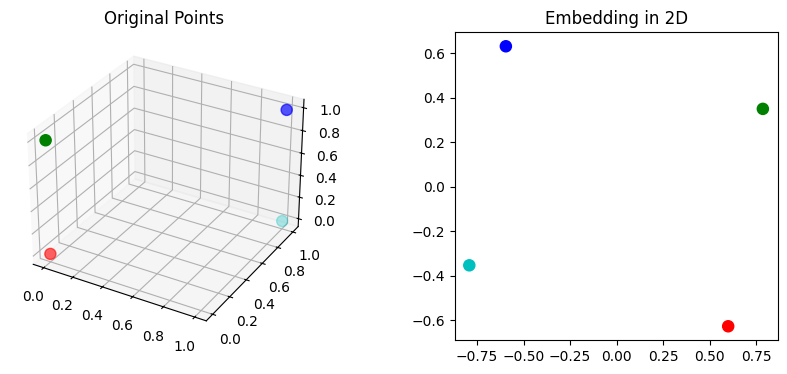

In [12]:
colors = ['r', 'g', 'b', 'c']
size = [64.0, 64.0, 64.0, 64.0]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

### Example 2-Improving Accuracy

We want to reduce the normalized stress without having to increase the number of iterations done in SMACOF. To do so, we chose an initial "guess" rather than letting it pick a random set of points.

#### Attempt 1 at Improving Accuracy

In [13]:
result,stress1 = smacof(X_dist,init = X_transform)
print(result)

[[ 0.59725649 -0.62794152]
 [ 0.78989525  0.35198126]
 [-0.59597278  0.62885723]
 [-0.79117896 -0.35289696]]


C:\Users\Allyson\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_mds.py:343: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 8
  warnings.warn(


Calculating normalized stress for this embedding,

In [14]:
print(np.sqrt(2*stress1)/np.linalg.norm(X_dist))

0.0015143088899729513


In [15]:
print("Original Distance Matrix:")
print(X_dist)
print()
print("Distance Matrix from MDS produces points:")
print(distance.cdist(X_transform,X_transform))
print(np.sqrt(2*stress)/np.linalg.norm(X_dist))
print()
print("Distance Matrix from SMACOF with CHOSEN MDS points:")
print(distance.cdist(result,result))
print(np.sqrt(2*stress1)/np.linalg.norm(X_dist))

Original Distance Matrix:
[[0.         1.         1.73205081 1.41421356]
 [1.         0.         1.41421356 1.73205081]
 [1.73205081 1.41421356 0.         1.        ]
 [1.41421356 1.73205081 1.         0.        ]]

Distance Matrix from MDS produces points:
[[0.         0.9947563  1.73584426 1.41896352]
 [0.9947563  0.         1.41040486 1.72819522]
 [1.73584426 1.41040486 0.         1.00385826]
 [1.41896352 1.72819522 1.00385826 0.        ]]
0.005945735087366905

Distance Matrix from SMACOF with CHOSEN MDS points:
[[0.         0.9986783  1.73301448 1.41541602]
 [0.9986783  0.         1.41325528 1.73108317]
 [1.73301448 1.41325528 0.         1.00097289]
 [1.41541602 1.73108317 1.00097289 0.        ]]
0.0015143088899729513


#### Attempt 2 at Improving Accuracy

What if we perform classical MDS on our distance matrix and initialize the smacof function with the corresponding coordinate matrix?

In [16]:
# Copyright 2017 Marco Galardini and John Lees

'''Function to perform classical MDS'''
# thanks to Francis Song for this function
# source: http://www.nervouscomputer.com/hfs/cmdscale-in-python/
def cmdscale(D,k):
    """Classical multidimensional scaling (MDS)

    Args:
        D (numpy.array)
            Symmetric distance matrix (n, n)

    Returns:
        Y (numpy.array)
            Configuration matrix (n, p). Each column represents a dimension. Only the
            p dimensions corresponding to positive eigenvalues of B are returned.
            Note that each dimension is only determined up to an overall sign,
            corresponding to a reflection.
        e (numpy.array)
            Eigenvalues of B (n, 1)
    """
    # Number of points
    n = len(D)

    # Centering matrix
    H = np.eye(n) - np.ones((n, n))/n

    # YY^T
    B = -H.dot(D**2).dot(H)/2

    # Diagonalize
    evals, evecs = np.linalg.eigh(B)

    # Sort by eigenvalue in descending order
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:, idx]

    # Compute the coordinates using positive-eigenvalued components only
    w, = np.where(evals > 0)
    L = np.diag(np.sqrt(evals[w[0]:w[k]]))
    V = evecs[:, 0:k]
    Y = V.dot(L)

    return Y, evals[evals > 0]

In [17]:
cs_0,ev = cmdscale(distance.cdist(X,X,'euclidean'),2)
result2,stress2 = smacof(X_dist,init = cs_0)
print()
print("The corresponding distance matrix:")
print(distance.cdist(cs_0,cs_0))
print()
print("The normalized stress:",np.sqrt(2*stress2)/np.linalg.norm(X_dist))


The corresponding distance matrix:
[[0.         1.         1.73205081 1.41421356]
 [1.         0.         1.41421356 1.73205081]
 [1.73205081 1.41421356 0.         1.        ]
 [1.41421356 1.73205081 1.         0.        ]]

The normalized stress: 1.3597399555105185e-16


C:\Users\Allyson\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_mds.py:343: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 8
  warnings.warn(


Let us compare these two attempts now:

In [18]:
print("Original Distance Matrix:")
print(X_dist)
print()
print("Distance Matrix from MDS produces points:")
print(distance.cdist(X_transform,X_transform))
print("The normalized stress:", np.sqrt(2*stress)/np.linalg.norm(X_dist))
print()
print("Distance Matrix from SMACOF with CHOSEN Metric MDS points (i.e. X_transform):")
print(distance.cdist(result,result))
print("The normalized stress:",np.sqrt(2*stress1)/np.linalg.norm(X_dist))
print()
print("Distance Matrix from SMACOF with CHOSEN CLassical MDS points:")
print(distance.cdist(cs_0,cs_0))
print("The normalized stress:",np.sqrt(2*stress2)/np.linalg.norm(X_dist))

Original Distance Matrix:
[[0.         1.         1.73205081 1.41421356]
 [1.         0.         1.41421356 1.73205081]
 [1.73205081 1.41421356 0.         1.        ]
 [1.41421356 1.73205081 1.         0.        ]]

Distance Matrix from MDS produces points:
[[0.         0.9947563  1.73584426 1.41896352]
 [0.9947563  0.         1.41040486 1.72819522]
 [1.73584426 1.41040486 0.         1.00385826]
 [1.41896352 1.72819522 1.00385826 0.        ]]
The normalized stress: 0.005945735087366905

Distance Matrix from SMACOF with CHOSEN Metric MDS points (i.e. X_transform):
[[0.         0.9986783  1.73301448 1.41541602]
 [0.9986783  0.         1.41325528 1.73108317]
 [1.73301448 1.41325528 0.         1.00097289]
 [1.41541602 1.73108317 1.00097289 0.        ]]
The normalized stress: 0.0015143088899729513

Distance Matrix from SMACOF with CHOSEN CLassical MDS points:
[[0.         1.         1.73205081 1.41421356]
 [1.         0.         1.41421356 1.73205081]
 [1.73205081 1.41421356 0.         1.  

## Applications of MDS

### Map Example

Now suppose we are given a distance matrix containing airline distances from nine cities to each other.

In [19]:
cities = ['Boston','New York', 'DC', 'Miami', 'Chicago','Seattle', 'San Francisco', 'Los Angeles', 'Denver']
city_dist = np.array([[0,206,429,1504,963,2976,3095,2979,1949],[206,0,233,1308,802,2815,2934,2786,1771],[429,233,0,1075,671,2684,2799,2631,1616],[1504,1308,1075,0,1329,3273,3053,2687,2037],[963,802,671,1329,0,2013,2142,2054,996],[2976,2815,2684,3273,2013,0,808,1131,1307],[3095,2934,2799,3053,2142,808,0,379,1235],[2979,2786,2631,2687,2054,1131,379,0,1059],[1949,1771,1616,2037,996,1307,1235,1059,0]])
city_dist

array([[   0,  206,  429, 1504,  963, 2976, 3095, 2979, 1949],
       [ 206,    0,  233, 1308,  802, 2815, 2934, 2786, 1771],
       [ 429,  233,    0, 1075,  671, 2684, 2799, 2631, 1616],
       [1504, 1308, 1075,    0, 1329, 3273, 3053, 2687, 2037],
       [ 963,  802,  671, 1329,    0, 2013, 2142, 2054,  996],
       [2976, 2815, 2684, 3273, 2013,    0,  808, 1131, 1307],
       [3095, 2934, 2799, 3053, 2142,  808,    0,  379, 1235],
       [2979, 2786, 2631, 2687, 2054, 1131,  379,    0, 1059],
       [1949, 1771, 1616, 2037,  996, 1307, 1235, 1059,    0]])

In [20]:
embedding1 = MDS(dissimilarity='precomputed',n_init = 4,max_iter = 300, random_state=0) #create an object from MDS class using'precomputed' distances
city_transform = embedding1.fit_transform(city_dist) #call fit_transform method to find the embeddings of the points in 2D
print("The points in 2D are:")
print(city_transform)

The points in 2D are:
[[-1427.34997717   -39.90372373]
 [-1237.53160175  -138.22904853]
 [-1051.4474479   -288.97153252]
 [ -781.1942056  -1362.21835714]
 [ -451.47315119   -31.29413114]
 [ 1249.29092248  1170.61900506]
 [ 1648.70440725   458.47554829]
 [ 1551.52432664    72.62979559]
 [  499.47672724   158.89244412]]


In [21]:
stress = embedding1.stress_
print(np.sqrt(2*stress)/np.linalg.norm(city_dist))

0.014005297229541296


Attempting improving accuracy using first method:

In [22]:
result,stress1 = smacof(city_dist,init = city_transform)

C:\Users\Allyson\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_mds.py:343: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 8
  warnings.warn(


In [31]:
print(np.sqrt(2*stress1)/np.linalg.norm(city_dist))

0.014001261404354539


Attempting improving accuracy using second method:

In [23]:
cs_1,r = cmdscale(city_dist,2)
cs = np.array([[-1348.66832958,   462.40059815],[-1198.87410815,   306.54690023],[-1076.9855404 ,   136.43203542],[-1226.939011  , -1013.62838367],[-428.45483272,   174.60316481],[1596.15940184,   639.30776896],[1697.22828136,  -131.68586278],[1464.04701004,  -560.5804599],[522.4871286 ,   -13.39576123]])
resultCity,stressCity = smacof(city_dist,init = cs_1)
print()
print("The normalized stress:",np.sqrt(2*stressCity)/np.linalg.norm(city_dist))


The normalized stress: 0.014005648317572712


C:\Users\Allyson\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_mds.py:343: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 8
  warnings.warn(


In [24]:
print("Original Distance Matrix:")
print(city_dist)
print()
print("Distance from MDS of original:")
print(distance.cdist(city_transform,city_transform))
print("The normalized stress is:", np.sqrt(2*stress)/np.linalg.norm(city_dist))
print()
print("Distance from SMACOF CHOSEN Metric MDS points:")
print(distance.cdist(result,result))
print("The normalized stress is:", np.sqrt(2*stress1)/np.linalg.norm(city_dist))
print()
print("Distance from SMACOF CHOSEN CMDS points:")
print(distance.cdist(resultCity,resultCity))
print("The normalized stress is:", np.sqrt(2*stressCity)/np.linalg.norm(city_dist))

Original Distance Matrix:
[[   0  206  429 1504  963 2976 3095 2979 1949]
 [ 206    0  233 1308  802 2815 2934 2786 1771]
 [ 429  233    0 1075  671 2684 2799 2631 1616]
 [1504 1308 1075    0 1329 3273 3053 2687 2037]
 [ 963  802  671 1329    0 2013 2142 2054  996]
 [2976 2815 2684 3273 2013    0  808 1131 1307]
 [3095 2934 2799 3053 2142  808    0  379 1235]
 [2979 2786 2631 2687 2054 1131  379    0 1059]
 [1949 1771 1616 2037  996 1307 1235 1059    0]]

Distance from MDS of original:
[[   0.          213.7729757   450.92957863 1471.74497481  975.91480395
  2937.647321   3116.1663105  2980.9991464  1937.05473985]
 [ 213.7729757     0.          239.47987138 1306.29003163  793.29878625
  2810.22587961 2947.27241285 2797.01527057 1762.23696374]
 [ 450.92957863  239.47987138    0.         1106.74999957  652.96768671
  2724.66540814 2801.69541162 2627.96833685 1614.2948735 ]
 [1471.74497481 1306.29003163 1106.74999957    0.         1371.15836762
  3246.24936792 3036.33554898 2738.67942118 

Below we plot the produced embedded points. We see that we have a graph of the United States with such cities

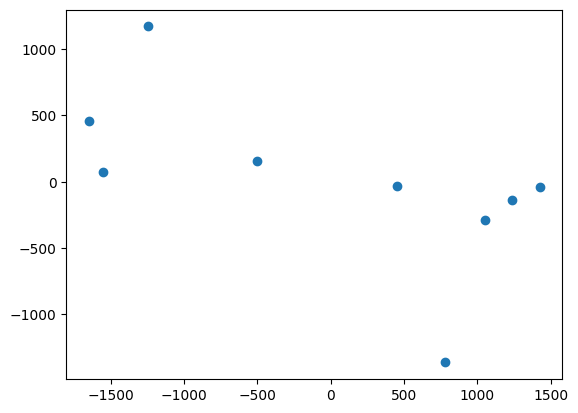

In [25]:
import matplotlib.pyplot as plt
import numpy as np
e1 = np.array([[1],[0]])
e2 = np.array([[0],[1]])
x = city_transform@e1
y = city_transform@e2
plt.scatter(-x, y)
plt.show()

## Tetrahedron Example

In [26]:
tetra_dist = np.array([[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]])

In [27]:
embedding3 = MDS(n_components = 3,metric = True, random_state=0, n_init = 4 , max_iter = 300, dissimilarity='precomputed') #create an object
tetra_transform3 = embedding3.fit_transform(tetra_dist) #finds X embedded in the new space, so it finds the points of X in 3D setting
print(tetra_transform3)

[[ 0.54638241  0.16257485 -0.20918137]
 [-0.00895432 -0.6128709   0.04187633]
 [-0.102957    0.24966448  0.5514803 ]
 [-0.4344711   0.20063157 -0.38417526]]


In [28]:
print(np.sqrt(2*embedding3.stress_)/np.linalg.norm(tetra_dist))

0.012914799969641328


In [29]:
embedding2 = MDS(n_components = 2,metric = True, random_state=0, n_init = 4 , max_iter = 300, dissimilarity='precomputed') #create an object
tetra_transform = embedding2.fit_transform(tetra_dist) #finds X embedded in the new space, so it finds the points of X in 2D setting
print(tetra_transform)

[[ 0.52893367  0.2705215 ]
 [ 0.2814039  -0.53834453]
 [-0.5385136  -0.27552598]
 [-0.27182397  0.543349  ]]


In [30]:
print(np.sqrt(2*embedding2.stress_)/np.linalg.norm(tetra_dist))

0.1695044409858806


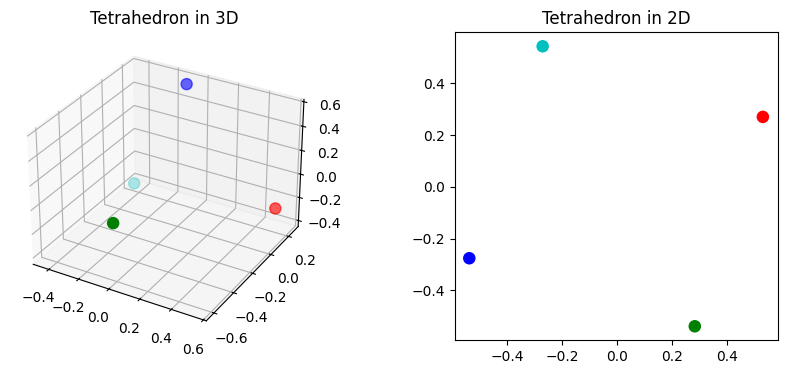

In [31]:
colors = ['r', 'g', 'b', 'c']
size = [64.0, 64.0, 64.0, 64.0]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(tetra_transform3[:,0], tetra_transform3[:,1], zs=tetra_transform3[:,2], s=size, c=colors)
plt.title('Tetrahedron in 3D')

ax = fig.add_subplot(122)
plt.scatter(tetra_transform[:,0], tetra_transform[:,1], s=size, c=colors)
plt.title('Tetrahedron in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

#### Attempting Improving Accuracy of 3 dimensional:

In [32]:
result4,stress4 = smacof(tetra_dist,init = tetra_transform3)
print("Distance matrix of embedded points with initializing from cmds:")
print(distance.cdist(result4,result4,'euclidean'))
print()
print("The normalized stress is then",np.sqrt(2*stress4)/np.linalg.norm(tetra_dist))

Distance matrix of embedded points with initializing from cmds:
[[0.         0.99356449 1.00351163 0.9997036 ]
 [0.99356449 0.         1.00201985 1.0056009 ]
 [1.00351163 1.00201985 0.         0.995469  ]
 [0.9997036  1.0056009  0.995469   0.        ]]

The normalized stress is then 0.005930753228952495


C:\Users\Allyson\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_mds.py:343: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 8
  warnings.warn(


#### Attempting Improving Accuracy of 2 dimensional:

In [33]:
result5,stress5 = smacof(tetra_dist,init = tetra_transform)
print("Distance matrix of embedded points with initializing from cmds:")
print(distance.cdist(result5,result5,'euclidean'))
print()
print("The normalized stress is then",np.sqrt(2*stress5)/np.linalg.norm(tetra_dist))

Distance matrix of embedded points with initializing from cmds:
[[0.         0.85086012 1.20430073 0.85089277]
 [0.85086012 0.         0.8561931  1.20988168]
 [1.20430073 0.8561931  0.         0.85624954]
 [0.85089277 1.20988168 0.85624954 0.        ]]

The normalized stress is then 0.16915347730539418


C:\Users\Allyson\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_mds.py:343: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 8
  warnings.warn(
